<a href="https://colab.research.google.com/github/VuDucCong18/Work-Project/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to the Sentiment Analysis & Booking Conversion Project
This project applies Natural Language Processing (NLP) and Machine Learning (ML) to analyze customer sentiment in restaurant reviews and its impact on booking conversion rates. The goal is to uncover data-driven insights that help Hungry Hub optimize restaurant partnerships, improve marketing strategies, and enhance customer experience.

**What This Codebook Covers:**

Data Preprocessing & Cleaning – Handling missing values, removing spam, and translating Thai reviews.

Sentiment Classification – Utilizing a fine-tuned DistilBERT model to categorize reviews as positive, neutral, or negative.

Conversion Rate Analysis – Measuring how sentiment correlates with customer booking behaviors.

Segment Analysis & Insights – Identifying restaurant groups based on sentiment and conversion trends.

Strategic Recommendations – Providing data-backed suggestions to improve restaurant performance.

**Machine Learning & Statistical Techniques Used:**

BERT-based Sentiment Analysis – Predicting sentiment scores for customer reviews.

Feature Engineering & Text Processing – Removing duplicates, detecting bots, and standardizing text.

Segmentation Analysis – Grouping restaurants into 9 key segments based on sentiment and conversion.

Quartile-Based Analysis – Assigning sentiment labels based on aggregated sentiment scores.

Correlation & Trend Analysis – Investigating how restaurant ratings (food, service, ambiance, value) relate to sentiment and conversions.

**Important Notes Before Running the Code:**

🚀 GPU Recommended – The sentiment classification model (DistilBERT) is computationally intensive. Enable GPU runtime to speed up processing.

⏳ Execution Time – Some processes, such as sentiment classification and segment mapping, may take 10-15 minutes depending on dataset size.

🔗 API Limitations – The Google Translate API for Thai-to-English translation requires Google Cloud credits. A pre-translated dataset is provided to bypass API constraints.

# Phase 1: Data Preprocessing & Multilingual Review Standardization

**Description:** In this phase, we focus on cleaning and preparing the review dataset to ensure consistency and usability. This includes:

1. Filtering out unusable data – Dropping null, NaN, and empty reviews to maintain data integrity.

2. Standardizing language – Translating Thai reviews to English for uniform sentiment analysis.

3. Ensuring data completeness – Refining the dataset to include only meaningful and interpretable customer feedback.

In [ ]:
import pandas as pd
import glob

# Define the folder path
folder_path = "/content/drive/My Drive/Data Analytic in Asia/full_sets_of_data_reviews/"

# Use glob to get all CSV files in the folder
csv_files = glob.glob(folder_path + "*.csv")

# Initialize an empty list to store DataFrames
df_list = []

# Loop through each file and read it
for file in csv_files:
    try:
        df = pd.read_csv(file, encoding="utf-8", low_memory=False, dtype=str)  # Read as string to avoid type issues
    except UnicodeDecodeError:
        df = pd.read_csv(file, encoding="ISO-8859-1", low_memory=False, dtype=str)  # Fallback encoding

    df_list.append(df)  # Append DataFrame to list

# Concatenate all DataFrames into one
df = pd.concat(df_list, ignore_index=True)

# Display the shape of the final DataFrame
print("Final DataFrame shape:", df.shape)

# Display the first 5 rows
print(df.head())

# From the shape, it has learnt that we have 273218 review records from 2016 - 2024

Final DataFrame shape: (273218, 32)
  id user_id reservation_id                                           review  \
0  1    3708          28565  amazing food as always. love the salmon rolls.    
1  2    3708          26028                                              NaN   
2  3    3708          28624                                              NaN   
3  5    5127          26816                                              NaN   
4  6    3708          28797                                        Great !\n   

  rating           created_at           updated_at state occasion featured  \
0      5  2016-02-23 06:58:46  2021-11-12 10:54:15   1.0      NaN        0   
1      5  2016-02-24 10:58:08  2021-11-12 10:54:15   1.0      NaN        0   
2      4  2016-02-24 11:13:07  2021-11-12 10:54:15   1.0      NaN        0   
3      3  2016-03-01 03:22:40  2021-11-12 10:54:15   1.0      NaN        0   
4      4  2016-03-01 13:16:15  2021-11-12 10:54:15   1.0      NaN        0   

   ... review_

In [ ]:
# To only keep the relevant columns (the first 7 columns) and the column 16th for restarant id and drop the non relevant columns
df_selected = df.iloc[:, list(range(7)) + [16]]

df_selected.tail()

,id,user_id,reservation_id,review,rating,created_at,updated_at,restaurant_id
273213,281704,63271,6732978,พนักงานบริการดีมาก บรรยากาศในร้านดี เมนูที่เลื...,5,2024-12-30 10:05:12,2024-12-30 10:07:42,NaN
273214,281705,213327,6735805,NaN,4,2024-12-30 10:05:20,2024-12-30 10:06:01,3905
273215,281706,NaN,6689923,NaN,5,2024-12-30 10:06:25,2024-12-30 10:06:25,NaN
273216,281707,230464,6743266,NaN,5,2024-12-30 10:07:23,2024-12-30 10:07:23,NaN
273217,281708,NaN,6518952,NaN,5,2024-12-30 10:24:34,2024-12-30 10:24:34,NaN


In [ ]:
df_selected.info()

#The information has shown that not all of reviews have an indicated restaurant_id, hence, we should drop those reviews that has no restaurant_id

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273218 entries, 0 to 273217
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id              273218 non-null  object
 1   user_id         205822 non-null  object
 2   reservation_id  271834 non-null  object
 3   review          127239 non-null  object
 4   rating          271834 non-null  object
 5   created_at      273218 non-null  object
 6   updated_at      273218 non-null  object
 7   restaurant_id   254163 non-null  object
dtypes: object(8)
memory usage: 16.7+ MB


In [ ]:
# Drop any rows that contains NAN, null or empty values for analysis
import numpy as np
df_selected = df_selected.replace(r'^\s*$', np.nan, regex=True)  # Convert empty strings to NaN
df_selected = df_selected.dropna(how='any')  # Drop rows with NaN in any column
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105040 entries, 0 to 273201
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id              105040 non-null  object
 1   user_id         105040 non-null  object
 2   reservation_id  105040 non-null  object
 3   review          105040 non-null  object
 4   rating          105040 non-null  object
 5   created_at      105040 non-null  object
 6   updated_at      105040 non-null  object
 7   restaurant_id   105040 non-null  object
dtypes: object(8)
memory usage: 7.2+ MB


In [ ]:
# Let's start to translate Thai to English for Sentiment Analysis by installing google translate package/library
#!pip3 install googletrans==3.1.0a0

**Note 1:**
Translating Thai Reviews to English
There are two main ways to translate Thai text to English:

1. googletrans (Free, Slow, Unofficial)

Uses Google's unofficial API (can be rate-limited).
Slow (~1-2 sec per row).
Best for small datasets (<1,000 rows).


2. Google Cloud Translation API (Fast, Official)

Uses Google’s official API (secure & scalable).
Very fast (~1000 rows in 10-15 sec).
Best for large datasets (10,000+ rows).

🔹In this project, we are highly recommendation to use Google Cloud API for fast & reliable translations.

In [ ]:
# Method 1
#import googletrans
#from googletrans import *

#translator = googletrans.Translator()


# Translate Thai language to English

# Change review column data type to string
#df_selected['review'][:100] = df_selected['review'][:100].astype(str)


# Apply translation only for non-English reviews
#df_selected['translated_review1'] = df_selected['review'].apply(translator.translate, src='auto', dest='en').apply(getattr, args=('text',))

# Display translated reviews
#df_selected[['review', 'translated_review1']].head(30)


In [ ]:
#pip install google-cloud-translate

In [ ]:
#import the API JSON file in your drive path
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/content/drive/My Drive/Data Analytic in Asia/data-analytic-in-asia-7929f923b518.json"

In [ ]:
# Method 2
import pandas as pd
import re
from google.cloud import translate_v2 as translate
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm  # Import tqdm for progress tracking

# Initialize Google Translate Client
translate_client = translate.Client()

# Function to detect Thai text
def is_thai(text):
    """Returns True if the text contains Thai characters, otherwise False."""
    return bool(re.search("[ก-๙]", str(text)))  # Checks if there are Thai characters

# Function to translate Thai text only
def translate_text(text):
    """Translates Thai text to English. If text is already English, returns it unchanged."""
    if pd.isna(text) or text.strip() == "":  # Skip empty or NaN values
        return text
    if not is_thai(text):  # If it's already in English, return it as is
        return text
    try:
        translated_text = translate_client.translate(text, target_language="en")["translatedText"]
        return translated_text
    except Exception as e:
        print(f"Translation error for text: {text}\nError: {e}")
        return text  # Return original if translation fails

# Function to batch translate Thai reviews with progress tracking
def batch_translate(texts):
    """Translates only Thai reviews using 10 parallel requests, with tqdm progress bar."""
    results = []
    with ThreadPoolExecutor(max_workers=10) as executor:
        for result in tqdm(executor.map(translate_text, texts), total=len(texts), desc="Translating Reviews"):
            results.append(result)
    return results

# Apply translation directly to df_selected
df_selected["review_translated"] = df_selected["review"]  # Create new column directly

# Identify Thai reviews
thai_mask = df_selected["review"].apply(is_thai)

# Translate only the Thai reviews using 10 parallel workers with progress tracking
df_selected.loc[thai_mask.index[thai_mask], "review_translated"] = pd.Series(
    batch_translate(df_selected.loc[thai_mask.index[thai_mask], "review"]),
    index=thai_mask.index[thai_mask]
)

# Show first 30 rows for verification
df_selected[['review', 'review_translated']].head(30)

**Note 2:**
Current Performance and Limitations


[1] First attempt: it took 13 mins

[2] Second attempt: it took 12 mins

[3] Third attempt: it took 15 mins

The main constraints come from:

Google Translate API Rate Limits – The API allows only 10 parallel requests at a time, which limits the speed of translation.

Network Latency – Each API request introduces some delay, especially when processing large batches.

Memory Usage – Storing and processing large datasets in memory can slow down execution and increase the risk of crashes.

Single-Threaded Processing for Some Parts – While translation runs in parallel, other operations like checking for Thai text still run sequentially, adding to the overall execution time.

If the dataset grows to 200,000+ records, processing time will increase proportionally, making real-time or near-instant translation infeasible with the current approach. Alternative methods may be needed to improve efficiency

**Note 3**: Due to API limitations and the constraints of the free trial package, we can only translate Thai to English using the Google Cloud API if we have available credits. Since translation incurs charges beyond the free usage limit, we implemented a **workaround** by pre-translating the Thai reviews, saving them into a CSV file, and then importing the translated data back into the Colab notebook for further analysis.

In [3]:
#This code is used to download the translated reviews into a CSV file in case the API does not work
#df_selected.to_csv("translated_reviews.csv", index=False, encoding="utf-8-sig")

In [3]:
# Import required libraries
import os
import pandas as pd
from google.colab import drive

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Define File Path
file_path = "/content/drive/My Drive/Data Analytic in Asia/translated_reviews.csv"

# Step 3: Check if the File Exists
if os.path.exists(file_path):
    print("File found! Loading...")
else:
    print("File not found! Please check the file path.")

# Step 4: Load CSV into DataFrame (Handling UTF-8 Encoding for Thai Language)
df_selected = pd.read_csv(file_path, encoding='utf-8-sig')

# Step 5: Display First 5 Rows
print("First 5 rows of the dataset:")
print(df_selected.head())

# Step 6: Display Data Types for Validation
print("Data Types Information:")
print(df_selected.info())

# Step 7: Summary Statistics (Optional)
print("Summary Statistics:")
print(df_selected.describe(include='all'))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File found! Loading...
First 5 rows of the dataset:
   id  user_id  reservation_id  \
0   1     3708           28565   
1   6     3708           28797   
2   8       32           29452   
3  20     3708           27207   
4  21     3708           22920   

                                            review  rating  \
0  amazing food as always. love the salmon rolls.        5   
1                                        Great !\n       4   
2                                 Awesome \n\n\n\n       5   
3          Best salad in town: Skinny Sumo Salad!!       5   
4                                 Best pork ribs!!       5   

            created_at           updated_at  restaurant_id  year  \
0  2016-02-23 06:58:46  2021-11-12 10:54:15             24  2016   
1  2016-03-01 13:16:15  2021-11-12 10:54:15            472  2016   
2  2016-03-08 08:12:37  2021-11-12 10

In [4]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105040 entries, 0 to 105039
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   id                 105040 non-null  int64 
 1   user_id            105040 non-null  int64 
 2   reservation_id     105040 non-null  int64 
 3   review             105040 non-null  object
 4   rating             105040 non-null  int64 
 5   created_at         105040 non-null  object
 6   updated_at         105040 non-null  object
 7   restaurant_id      105040 non-null  int64 
 8   year               105040 non-null  int64 
 9   review_translated  105040 non-null  object
dtypes: int64(6), object(4)
memory usage: 8.0+ MB


# Phase 2: Text-Preprocessing & Feature Engineering
**Description:** This phase focuses on cleaning, filtering, and standardizing review data to enhance its usability for sentiment analysis and machine learning models. By removing spam, irrelevant content, and normalizing text, we ensure that only high-quality, meaningful reviews are used for insights.

**2.1 Detect & Remove Spam, Bot and Irrelevant Reviews**

In [6]:
!pip install pandarallel

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 6.8 MB/s eta 0:00:00
  Created wheel for pandarallel: filename=pandarallel-1.6.5-py3-none-any.whl size=16674 sha256=f2dccf8b6b5875dd5d9872b9899387f767815b3a9e343f9b9893aaf20b536e3d
  Stored in directory: /root/.cache/pip/wheels/b9/c6/5a/829298789e94348b81af52ab42c19d49da007306bbcc983827
Successfully built pandarallel


In [7]:
import pandas as pd
import re
from pandarallel import pandarallel

# Enable parallel processing
pandarallel.initialize(progress_bar=True)

# Compile regex patterns for faster lookup
spam_patterns = re.compile(r"(test|lorem ipsum|generated by|auto-reply|spam|fake)", re.IGNORECASE)
special_characters = re.compile(r"[^\w\s]")
url_pattern = re.compile(r"https?://\S+|www\.\S+")  # Detects URLs
emoji_pattern = re.compile(r"[^\w\s,]")  # Detects emojis and symbols

# Step 1: Detect Duplicate Reviews Across Users (Same User, Same Day, >3 Times)
def detect_duplicate_reviews(df):
    """Flags reviews that appear more than 3 times from the same user on the same day."""
    duplicate_counts = df.groupby(["user_id", "review_translated", "created_at"]).size()
    duplicate_reviews = duplicate_counts[duplicate_counts > 3].index
    return df.set_index(["user_id", "review_translated", "created_at"]).index.isin(duplicate_reviews)

# Step 2: Rule-Based Spam Detection
def detect_spam(review):
    """Detects bot-generated or spam-like reviews."""

    if pd.isna(review) or review.strip() == "":  # Check for NaN or empty values
        return True

    review = review.lower().strip()  # Normalize text

    # 1️. Remove bot/test reviews (fast regex lookup)
    if spam_patterns.search(review):
        return True

    # 2️. Detect unnatural sentiment overload (too many exclamation marks or uppercase)
    if review.count("!") > 3 or sum(1 for c in review if c.isupper()) > len(review) * 0.5:
        return True

    # 3️. Remove reviews with too many special characters or emojis
    if len(emoji_pattern.findall(review)) > len(review) * 0.4:  # More than 40% special characters
        return True

    # 4️. Detect suspicious links (potential promo/spam content)
    if url_pattern.search(review):
        return True

    return False  # If none of the spam conditions are met, return False (not spam)

# Apply spam filtering
df_selected["is_duplicate"] = detect_duplicate_reviews(df_selected)
df_selected["is_spam"] = df_selected["review_translated"].parallel_apply(detect_spam)

# Remove spam and duplicate reviews
df_selected_filtered = df_selected[(df_selected["is_spam"] == False) & (df_selected["is_duplicate"] == False)]
df_selected_filtered = df_selected_filtered.drop(columns=["is_spam", "is_duplicate"])

# Display results
print(df_selected_filtered[["review_translated"]].head(30))


INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


                                    review_translated
0     amazing food as always. love the salmon rolls. 
1                                           Great !\n
2                                    Awesome \n\n\n\n
3             Best salad in town: Skinny Sumo Salad!!
4                                    Best pork ribs!!
5                   Perfect place for hosting events!
6                               Great Vietnamese food
8   Wonderful food & amazing customer focus ! \n\n...
9   Tasty food, especially the Moroccan cuisine wa...
10                                        Great tapas
12                                Very good service. 
13                                    good and smooth
15  Their Thai food was amazing! The best Massaman...
16                                 superb as always\n
17  Truly enjoyable experience in a comfortable 'h...
18  Amazing food!! Best Mexican restaurant in Bang...
19  We ordered a mocktail and received a cocktail,...
20  Decent ambience, best ma

**Note 4: Explanation of the Filters in 2.1**

*Step 1: Detect Duplicate Reviews Across Users*

Flags reviews that appear more than 3 times from the same user on the same day.
Prevents spam bots or fake reviewers from copy-pasting the same review multiple times.

*Step 2: Rule-Based Spam Detection*

Bot/Test Reviews: Removes reviews with spam keywords ("test", "auto-reply", "lorem ipsum").

Unnatural Sentiment Overload: Filters reviews with excessive exclamation marks ("Best ever!!!!!!!") or too many uppercase letters ("AMAZING SERVICE WOW!!").

Too Many Special Characters/Emojis: Removes reviews where 40%+ of the text is non-alphanumeric (e.g., "🔥🔥🔥😍😍😍").

Suspicious Promotional Links: Flags reviews containing URLs (www.something.com), often used in fake promotions.

In [8]:
#From 104232 records, we have cleaned down to 104232 that are likely to be authentic reviews
# We detected that 808 reviews are likely to be "Bot" or "Spam" reviews
df_selected_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104232 entries, 0 to 105039
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   id                 104232 non-null  int64 
 1   user_id            104232 non-null  int64 
 2   reservation_id     104232 non-null  int64 
 3   review             104232 non-null  object
 4   rating             104232 non-null  int64 
 5   created_at         104232 non-null  object
 6   updated_at         104232 non-null  object
 7   restaurant_id      104232 non-null  int64 
 8   year               104232 non-null  int64 
 9   review_translated  104232 non-null  object
dtypes: int64(6), object(4)
memory usage: 8.7+ MB


In [9]:
#Testing
#df_selected_filtered[df_selected_filtered['translated_review'].str.contains('Really good')]

df_selected_filtered[df_selected_filtered['review_translated'].str.contains('Test')]

,id,user_id,reservation_id,review,rating,created_at,updated_at,restaurant_id,year,review_translated


**2.2 Standardise and Normalise Text**

In [10]:
df_selected_filtered['review_translated'].head(50)

,review_translated
0,amazing food as always. love the salmon rolls.
1,Great !\n
2,Awesome \n\n\n\n
3,Best salad in town: Skinny Sumo Salad!!
4,Best pork ribs!!
5,Perfect place for hosting events!
6,Great Vietnamese food
8,Wonderful food & amazing customer focus ! \n\n...
9,"Tasty food, especially the Moroccan cuisine wa..."
10,Great tapas


In [11]:
#pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 11.1 MB/s eta 0:00:00


In [12]:
import re
import contractions
import pandas as pd

def clean_text(text):
    """Cleans and standardizes text while keeping sentence structure for sentiment analysis."""

    if pd.isna(text) or text.strip() == "":
        return ""  # Handle empty or NaN values

    text = text.lower().strip()  # 1️. Convert to lowercase and remove leading/trailing spaces

    # 2️ .Expand contractions using the contractions library
    text = contractions.fix(text)

    # 3. Remove newline characters and excessive spaces
    text = re.sub(r"\s+", " ", text).strip()  # Replaces multiple spaces & newlines with a single space

    # 4️. Remove special characters & numbers, keeping only letters and spaces
    text = re.sub(r"[^a-zA-Z\s]", "", text)

    # 5️. Normalize elongated words (e.g., "soooo good" → "so good")
    text = re.sub(r"(.)\1{2,}", r"\1\1", text)  # Limits repeated characters to 2

    return text

# Apply cleaning function to 'translated_review' column
df_selected["cleaned_review"] = df_selected["review_translated"].apply(clean_text)

# Display a sample of cleaned text
print(df_selected[["review_translated", "cleaned_review"]].head(10))

                                   review_translated  \
0    amazing food as always. love the salmon rolls.    
1                                          Great !\n   
2                                   Awesome \n\n\n\n   
3            Best salad in town: Skinny Sumo Salad!!   
4                                   Best pork ribs!!   
5                  Perfect place for hosting events!   
6                              Great Vietnamese food   
7                       Best hot chocolate ever!!!!    
8  Wonderful food & amazing customer focus ! \n\n...   
9  Tasty food, especially the Moroccan cuisine wa...   

                                      cleaned_review  
0       amazing food as always love the salmon rolls  
1                                             great   
2                                            awesome  
3               best salad in town skinny sumo salad  
4                                     best pork ribs  
5                   perfect place for hosting events 

**Note 5: Explanation of the Normalisation in 2.2**

Removes \n (newline characters) → Converts multi-line text into a single clean sentence.

Converts text to lowercase → Standardizes text for consistent processing.

Expands contractions ("can't" → "cannot", "it's" → "it is").

Removes excessive whitespace → Ensures proper sentence spacing.

Removes special characters & numbers → Keeps only meaningful words.

Normalizes letter elongation ("sooo good" → "so good").


# Phase 3: Sentiment Classification & Aggregation

**Desciption:** In this phase, we employ a DistilBERT deep learning model to classify customer reviews based on sentiment. By analyzing the textual data, the model assigns positive and negative sentiment scores to each review, allowing us to derive meaningful insights into customer perception.

In [2]:
#pip install transformers torch tqdm pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [13]:
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import pandas as pd
import numpy as np
from tqdm import tqdm

# Enable tqdm for progress tracking
tqdm.pandas()

# Load DistilBERT Model & Tokenizer for Sentiment Analysis
MODEL_NAME = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

# Move model to GPU if available for faster inference
device = "cuda" if torch.cuda.is_available() else "cpu"
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME).to(device)

# Function for Batch Sentiment Classification (Returns Scores & Aggregated Score)
def classify_sentiment_batch(texts):
    """Predicts sentiment for a batch of reviews and computes an aggregated score."""

    # Tokenize batch of texts at once (efficient processing)
    inputs = tokenizer(texts, return_tensors="pt", truncation=True, padding=True, max_length=512).to(device)

    with torch.no_grad():
        outputs = model(**inputs)
        probabilities = torch.nn.functional.softmax(outputs.logits, dim=-1)

    # Extract sentiment labels & scores for the entire batch
    sentiment_labels = []
    positive_scores = []
    negative_scores = []
    aggregated_scores = []

    for prob in probabilities:
        negative_score = prob[0].item()
        positive_score = prob[1].item()

        # Compute aggregated score: (positive - negative)
        aggregated_score = positive_score - negative_score

        # Store values
        positive_scores.append(positive_score)
        negative_scores.append(negative_score)
        aggregated_scores.append(aggregated_score)

        # Assign sentiment labels
        if positive_score > 0.6:
            sentiment_labels.append(1)  # Positive
        elif negative_score > 0.6:
            sentiment_labels.append(-1)  # Negative
        else:
            sentiment_labels.append(0)  # Neutral

    return sentiment_labels, positive_scores, negative_scores, aggregated_scores

# Apply Sentiment Classification in True Batches
batch_size = 32
reviews = df_selected["cleaned_review"].tolist()

# Process in batches
sentiment_labels = []
positive_scores = []
negative_scores = []
aggregated_scores = []

for i in tqdm(range(0, len(reviews), batch_size), desc="Processing Sentiment Batches"):
    batch = reviews[i : i + batch_size]
    batch_labels, batch_pos_scores, batch_neg_scores, batch_agg_scores = classify_sentiment_batch(batch)

    sentiment_labels.extend(batch_labels)
    positive_scores.extend(batch_pos_scores)
    negative_scores.extend(batch_neg_scores)
    aggregated_scores.extend(batch_agg_scores)

# Store Results in DataFrame
df_selected["sentiment_label"] = sentiment_labels
df_selected["positive_score"] = positive_scores
df_selected["negative_score"] = negative_scores
df_selected["aggregated_score"] = aggregated_scores  # New column

# Display Sample Results
print(df_selected[["cleaned_review", "sentiment_label", "positive_score", "negative_score", "aggregated_score"]].head(20))


Processing Sentiment Batches: 100%|██████████| 3283/3283 [07:53<00:00,  6.94it/s]


                                       cleaned_review  sentiment_label  \
0        amazing food as always love the salmon rolls                1   
1                                              great                 1   
2                                             awesome                1   
3                best salad in town skinny sumo salad                1   
4                                      best pork ribs                1   
5                    perfect place for hosting events                1   
6                               great vietnamese food                1   
7                             best hot chocolate ever                1   
8   wonderful food  amazing customer focus  best n...                1   
9   tasty food especially the moroccan cuisine was...                1   
10                                        great tapas                1   
11                                              testt               -1   
12                                  ve

In [14]:
df_selected.groupby('sentiment_label')['id'].count()

,id
sentiment_label,
-1,19165
0,659
1,85216


**Note 6: Current Performance of DistilBERT(Deep Learning Model)**

[1] First Attempt: 7 mins

[2] Second Attempt: 7 mins

Note that, it must be ran by GPU for such performance. CPU may take much much longer and it is not recommended to run by CPU

sentiment_label
 1    85216
-1    19165
 0      659
Name: count, dtype: int64


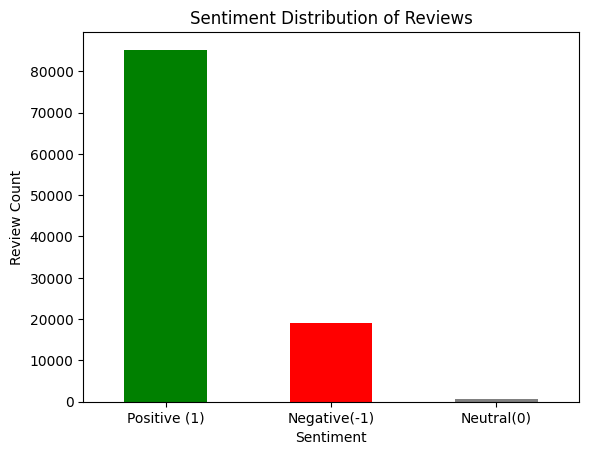

In [15]:
# Count reviews by sentiment category
sentiment_counts = df_selected["sentiment_label"].value_counts()
print(sentiment_counts)

# Visualize sentiment distribution
import matplotlib.pyplot as plt

sentiment_counts.plot(kind="bar", color=["green", "red", "grey"])
plt.xticks(ticks=[0,1,2], labels=["Positive (1)", "Negative(-1)", "Neutral(0)"], rotation=0)
plt.title("Sentiment Distribution of Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Review Count")
plt.show()


# Phase 4: Restaurant Segmentation & Attribute Enrichment

**Description:** In this phase, we group, segment, and enrich restaurant data using sentiment scores, conversion rates, and key customer ratings. By structuring the data into meaningful segments, we aim to uncover insights that help identify business opportunities and areas for improvement.


In [17]:
# This code is to check that each restaurant_id can contain more than 1 review. Therefore, we need to groupby the restaurant_review to find average_aggregated sentiment score for each restaurant
# For example, there are more than 4 reviews that reviews for restaurant_id 10
df_selected[df_selected['restaurant_id'] == 10]

,id,user_id,reservation_id,review,rating,created_at,updated_at,restaurant_id,year,review_translated,is_duplicate,is_spam,cleaned_review,sentiment_label,positive_score,negative_score,aggregated_score
15910,55738,12494,536782,อาหารโดยรวมรสชาติปานกลาง\n*ไม่สามารถใช้คูปองส่...,2,2020-08-02 03:09:53,2023-04-19 16:34:47,10,2020,"Overall, the food tastes average. *Discount co...",False,False,overall the food tastes average discount coupo...,-1,0.008424,0.991576,-0.983152
18119,64092,36652,585013,เป็น บุฟเฟ่ต์ โรงแรม ที่ทำเนื้อแกะได้อร่อยมาก ...,5,2020-09-26 14:12:37,2021-11-12 10:54:15,10,2020,It&#39;s a hotel buffet that makes very delici...,False,False,its a hotel buffet that makes very delicious l...,1,0.999822,0.000178,0.999644
52532,74361,258296,725777,อาหารอร่อยค่ะ,5,2021-01-29 13:45:45,2023-04-19 16:34:46,10,2021,The food is delicious.,False,False,the food is delicious,1,0.999881,0.000119,0.999762
54353,78409,284244,771841,บริการdddddddมากกก,5,2021-03-07 14:09:39,2021-11-12 10:54:15,10,2021,Very good servicedddddddd,False,False,very good servicedd,1,0.999780,0.000220,0.999561


In [18]:
#Create a new dataframe and Rename the aggregated_score to avg_score in analysis_df
analysis_df = df_selected.groupby('restaurant_id', as_index=False)['aggregated_score'].mean()
analysis_df = analysis_df.rename(columns={"aggregated_score": "avg_sentiment_score"})
analysis_df.head(10)

,restaurant_id,avg_sentiment_score
0,5,0.720024
1,10,0.503954
2,13,-0.491737
3,14,0.999765
4,20,0.999648
5,22,0.868153
6,24,0.600141
7,25,0.001092
8,33,0.774802
9,34,0.618555


**Note 7: Steps to Determine Sentiment Thresholds and check the range of aggregated_score**

Since aggregated_score = positive_score - negative_score, the range typically falls between -1 (fully negative) to +1 (fully positive).
Calculate Distribution Metrics

Mean (μ) and Standard Deviation (σ) of aggregated_score to understand sentiment spread.
Use percentiles (25th, 50th, 75th, 90th) to classify sentiment.
Define Reasonable Sentiment Categories

High Sentiment: Scores above 75th percentile or μ + 0.5σ.

Neutral Sentiment: Scores between 25th to 75th percentile.

Low Sentiment: Scores below 25th percentile or μ - 0.5σ

In [71]:
import numpy as np

# Compute Mean and Standard Deviation
mean_sentiment = np.mean(analysis_df["avg_sentiment_score"])
std_sentiment = np.std(analysis_df["avg_sentiment_score"])

# Compute Key Percentiles
percentiles = np.percentile(analysis_df["avg_sentiment_score"], [25, 50, 75])

# Print Thresholds
print(f"Sentiment Score Distribution Analysis:")
print(f"Mean Sentiment Score: {mean_sentiment:.4f}")
print(f"Standard Deviation: {std_sentiment:.4f}")
print(f"25th Percentile (Low Sentiment Threshold): {percentiles[0]:.4f}")
print(f"50th Percentile (Neutral Benchmark): {percentiles[1]:.4f}")
print(f"75th Percentile (High Sentiment Threshold): {percentiles[2]:.4f}")

Sentiment Score Distribution Analysis:
Mean Sentiment Score: 0.6131
Standard Deviation: 0.4734
25th Percentile (Low Sentiment Threshold): 0.4532
50th Percentile (Neutral Benchmark): 0.7365
75th Percentile (High Sentiment Threshold): 0.9984


In [20]:
import plotly.express as px

# Create an interactive boxplot using Plotly
fig = px.box(
    analysis_df,
    y="avg_sentiment_score",
    points="all",
    title="Interactive Distribution of Average Sentiment Scores by Restaurant",
    labels={"avg_sentiment_score": "Avg Sentiment Score"},
    hover_data={"avg_sentiment_score": True}
)

# Improve aesthetics
fig.update_layout(
    title_x=0.5,
    yaxis=dict(title="Avg Sentiment Score", showgrid=True),
    template="plotly_white"
)

# Show the interactive plot
fig.show()

In [21]:
# Calculate quartiles for categorizing sentiment scores
q1 = analysis_df["avg_sentiment_score"].quantile(0.25)  # 25th percentile
q3 = analysis_df["avg_sentiment_score"].quantile(0.75)  # 75th percentile

# Define sentiment labels based on quartiles
def categorize_sentiment(score):
    if score >= q3:
        return "High Sentiment"
    elif score <= q1:
        return "Low Sentiment"
    else:
        return "Neutral Sentiment"

# Apply function to create new column
analysis_df["sentiment_label"] = analysis_df["avg_sentiment_score"].apply(categorize_sentiment)

analysis_df.head(10)

,restaurant_id,avg_sentiment_score,sentiment_label
0,5,0.720024,Neutral Sentiment
1,10,0.503954,Neutral Sentiment
2,13,-0.491737,Low Sentiment
3,14,0.999765,High Sentiment
4,20,0.999648,High Sentiment
5,22,0.868153,Neutral Sentiment
6,24,0.600141,Neutral Sentiment
7,25,0.001092,Low Sentiment
8,33,0.774802,Neutral Sentiment
9,34,0.618555,Neutral Sentiment


**Note 8: Importing the Conversion Rate of Each Restaurant CSV**

In [22]:
import os
import pandas as pd
from google.colab import drive

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Define File Path
file_path = "/content/drive/My Drive/Data Analytic in Asia/Conversion_Rate_Per_Restaurant_Id.csv"

# Step 3: Check if the File Exists
if os.path.exists(file_path):
    print("File found! Loading...")
else:
    print("File not found! Please check the file path.")

# Step 4: Load CSV into DataFrame (Handling UTF-8 Encoding for Thai Language)
CR_df = pd.read_csv(file_path, encoding='utf-8-sig')

# Step 5: Display First 5 Rows
print("First 5 rows of the dataset:")
print(CR_df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File found! Loading...
First 5 rows of the dataset:
   restaurant_id  conversion_rate
0              1          1.00000
1              2          0.96891
2              4          0.98352
3              5          0.97778
4              6          1.00000


In [23]:
# Merge sentiment scores with conversion rates using an outer join
merged_df = analysis_df.merge(CR_df, on='restaurant_id', how='outer')

# Display the first few rows of the merged dataframe
print(merged_df.head(10))
# To view the shape of the merged_df
merged_df.shape

   restaurant_id  avg_sentiment_score    sentiment_label  conversion_rate
0              1                  NaN                NaN          1.00000
1              2                  NaN                NaN          0.96891
2              4                  NaN                NaN          0.98352
3              5             0.720024  Neutral Sentiment          0.97778
4              6                  NaN                NaN          1.00000
5              7                  NaN                NaN          1.00000
6              8                  NaN                NaN          1.00000
7              9                  NaN                NaN          1.00000
8             10             0.503954  Neutral Sentiment          0.76531
9             11                  NaN                NaN          1.00000


(4302, 4)

In [24]:
# To filter away restaurants that do not have enough info on either sentiment or conversion rate
filtered_df = merged_df[merged_df.notna().all(axis=1)]
filtered_df.head()

,restaurant_id,avg_sentiment_score,sentiment_label,conversion_rate
3,5,0.720024,Neutral Sentiment,0.97778
8,10,0.503954,Neutral Sentiment,0.76531
11,13,-0.491737,Low Sentiment,0.97611
12,14,0.999765,High Sentiment,0.96721
18,20,0.999648,High Sentiment,1.00000


In [37]:
# Ensure modification happens on a copy-aware DataFrame using .loc
filtered_df = filtered_df.copy()

# Define conversion rate categories
def categorize_conversion_rate(rate):
    if rate >= 0.75:
        return "High Conversion"
    elif rate >= 0.50:
        return "Medium Conversion"
    else:
        return "Low Conversion"

# Apply the function using .loc to avoid SettingWithCopyWarning
filtered_df.loc[:, "conversion_label"] = filtered_df["conversion_rate"].apply(categorize_conversion_rate)
filtered_df.head()

,restaurant_id,avg_sentiment_score,sentiment_label,conversion_rate,conversion_label,segment_category
3,5,0.720024,Neutral Sentiment,0.97778,High Conversion,"Segment 4 (Neutral Sentiment, High Conversion)"
8,10,0.503954,Neutral Sentiment,0.76531,High Conversion,"Segment 4 (Neutral Sentiment, High Conversion)"
11,13,-0.491737,Low Sentiment,0.97611,High Conversion,"Segment 7 (Low Sentiment, High Conversion)"
12,14,0.999765,High Sentiment,0.96721,High Conversion,"Segment 1 (High Sentiment, High Conversion)"
18,20,0.999648,High Sentiment,1.00000,High Conversion,"Segment 1 (High Sentiment, High Conversion)"


**Note 9:**
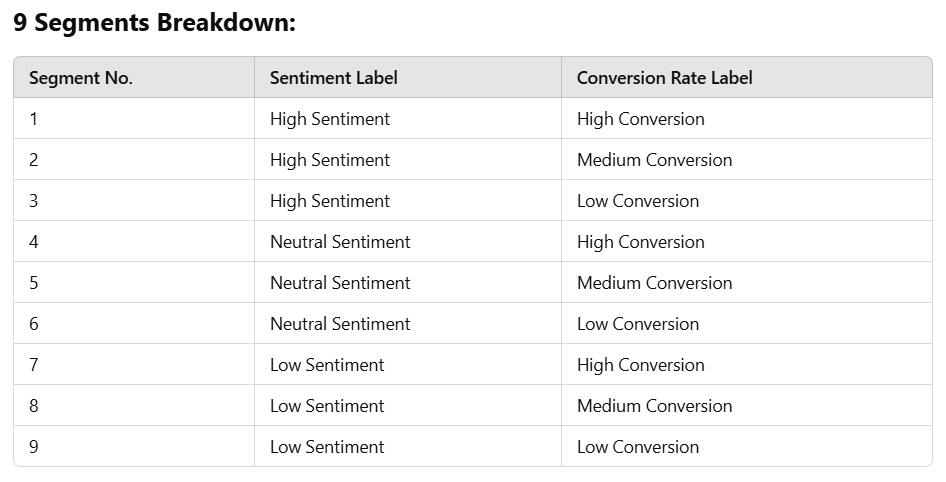

In [26]:
# Define a mapping function to assign segment labels
def assign_segment_label(row):
    return f"Segment {segment_mapping[(row['sentiment_label'], row['conversion_label'])]} ({row['sentiment_label']}, {row['conversion_label']})"

# Create a dictionary to map combinations to segment numbers
segment_mapping = {
    ('High Sentiment', 'High Conversion'): 1,
    ('High Sentiment', 'Medium Conversion'): 2,
    ('High Sentiment', 'Low Conversion'): 3,
    ('Neutral Sentiment', 'High Conversion'): 4,
    ('Neutral Sentiment', 'Medium Conversion'): 5,
    ('Neutral Sentiment', 'Low Conversion'): 6,
    ('Low Sentiment', 'High Conversion'): 7,
    ('Low Sentiment', 'Medium Conversion'): 8,
    ('Low Sentiment', 'Low Conversion'): 9
}

# Apply the function to create the new segment column
filtered_df['segment_category'] = filtered_df.apply(assign_segment_label, axis=1)

# Display the updated DataFrame
filtered_df.head()

,restaurant_id,avg_sentiment_score,sentiment_label,conversion_rate,conversion_label,segment_category
3,5,0.720024,Neutral Sentiment,0.97778,High Conversion,"Segment 4 (Neutral Sentiment, High Conversion)"
8,10,0.503954,Neutral Sentiment,0.76531,High Conversion,"Segment 4 (Neutral Sentiment, High Conversion)"
11,13,-0.491737,Low Sentiment,0.97611,High Conversion,"Segment 7 (Low Sentiment, High Conversion)"
12,14,0.999765,High Sentiment,0.96721,High Conversion,"Segment 1 (High Sentiment, High Conversion)"
18,20,0.999648,High Sentiment,1.00000,High Conversion,"Segment 1 (High Sentiment, High Conversion)"


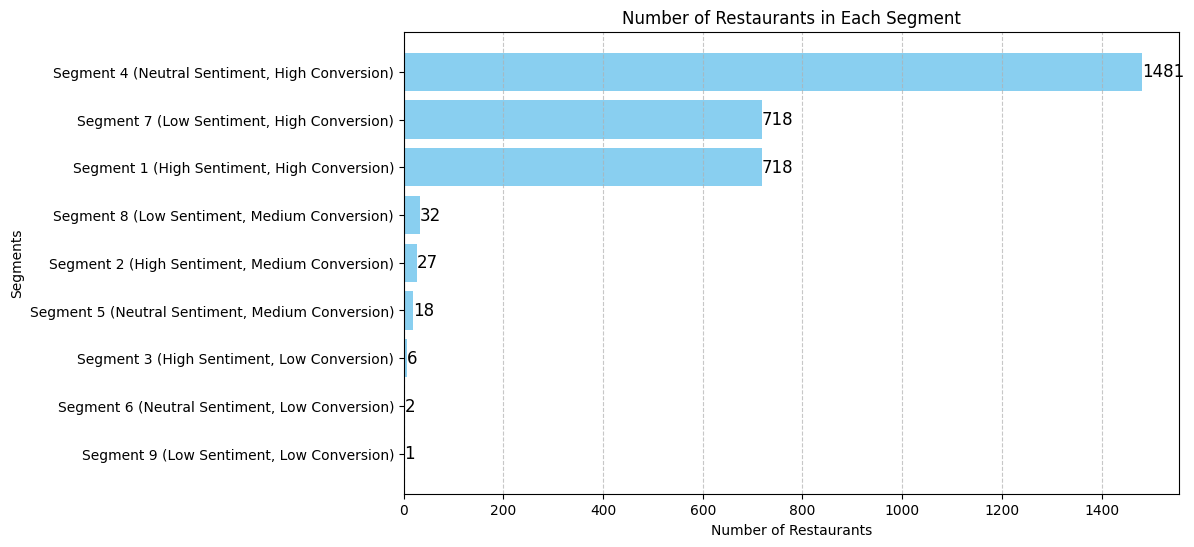

In [27]:
import matplotlib.pyplot as plt

# Count the number of restaurants in each segment
segment_counts = filtered_df["segment_category"].value_counts().sort_values()

# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(segment_counts.index, segment_counts.values, color="#89CFF0")  # Baby blue color

# Add labels on the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             str(int(bar.get_width())), ha='left', va='center', fontsize=12)

# Labels and title
plt.xlabel("Number of Restaurants")
plt.ylabel("Segments")
plt.title("Number of Restaurants in Each Segment")
plt.grid(axis='x', linestyle="--", alpha=0.7)

# Show plot
plt.show()

**Note 10: Importing 4 Key Rating Per Restaurant**

In [28]:
import os
import pandas as pd
from google.colab import drive

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Define File Path
file_path = "/content/drive/My Drive/Data Analytic in Asia/Four_Rating_Review_Data.csv"

# Step 3: Check if the File Exists
if os.path.exists(file_path):
    print("File found! Loading...")
else:
    print("File not found! Please check the file path.")

# Step 4: Load CSV into DataFrame (Handling UTF-8 Encoding for Thai Language)
rating_df = pd.read_csv(file_path, encoding='utf-8-sig')

# Step 5: Display First 5 Rows
print("First 5 rows of the dataset:")
print(rating_df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File found! Loading...
First 5 rows of the dataset:
     id  one_star  two_star  three_star  four_star  five_star  total  average  \
0  4605         0         0           0          8         73     81      4.9   
1  4606         1         0          11         21         80    113      4.6   
2  4607         1         2           8         21         89    121      4.6   
3  4608         1         6          24         78        248    357      4.6   
4  4609         0         6          37        108        585    736      4.7   

   restaurant_id  branch_id           created_at           updated_at  \
0            168        NaN  2023-09-26 11:10:55  2024-12-29 14:36:14   
1            447        NaN  2023-09-26 11:10:56  2024-12-23 08:15:46   
2            273        NaN  2023-09-26 11:10:58  2024-11-08 16:33:53   
3            565        NaN  2023-09-26 

In [67]:
#only keep the restaurant_id and the four rating
rating_filtered = rating_df[['restaurant_id', 'overall_food', 'overall_ambience', 'overall_service', 'overall_value']]
rating_filtered.head()

,restaurant_id,overall_food,overall_ambience,overall_service,overall_value
0,168,4.7,4.8,4.8,4.7
1,447,4.4,4.4,4.2,4.4
2,273,4.3,4.6,4.7,4.3
3,565,4.4,2.8,2.8,4.3
4,222,4.4,4.6,4.7,4.4


In [68]:
# Perform an outer join between filtered_df and rating_filtered on 'restaurant_id'
final_df = filtered_df.merge(rating_filtered, on='restaurant_id', how='left')

#Replace 0 rating to np because it can skew the result
final_df[['overall_food', 'overall_ambience', 'overall_service', 'overall_value']] = \
final_df[['overall_food', 'overall_ambience', 'overall_service', 'overall_value']].replace(0.0, np.nan)


#Create a new column called "overall_rating" that take it the means of all 4 key attributes
final_df['average_overall_rating'] = final_df[['overall_food', 'overall_ambience', 'overall_service', 'overall_value']].mean(axis=1)

# Display the first few rows of the final DataFrame
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3003 entries, 0 to 3002
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   restaurant_id           3003 non-null   int64  
 1   avg_sentiment_score     3003 non-null   float64
 2   sentiment_label         3003 non-null   object 
 3   conversion_rate         3003 non-null   float64
 4   conversion_label        3003 non-null   object 
 5   segment_category        3003 non-null   object 
 6   overall_food            2466 non-null   float64
 7   overall_ambience        2411 non-null   float64
 8   overall_service         2411 non-null   float64
 9   overall_value           2466 non-null   float64
 10  average_overall_rating  2466 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 258.2+ KB


We have total of 2588 restaunrants that have all 4 key rating and sentiment score and conversion rate, 415 restaurants do not have 4 key ratings.

# Phase 5: In-Depth Segment Analysis & Actionable Insights

**Description:** In this phase, we analyze each restaurant segment in-depth by examining sentiment, conversion rates, and customer ratings. We then derive major insights to help HungryHub identify business opportunities, optimize restaurant strategies, and enhance customer satisfaction

In [70]:
final_df.groupby('segment_category').agg(
    overall_food=('overall_food', 'mean'),
    overall_ambience=('overall_ambience', 'mean'),
    overall_service=('overall_service', 'mean'),
    overall_value=('overall_value', 'mean'),
    average_overall_rating=('average_overall_rating', 'mean'),
    num_restaurants=('restaurant_id', 'count')  # Count unique restaurants in each segment
).sort_values(by='average_overall_rating', ascending=False)  # Sort AFTER aggregation

,overall_food,overall_ambience,overall_service,overall_value,average_overall_rating,num_restaurants
segment_category,,,,,,
"Segment 2 (High Sentiment, Medium Conversion)",4.768182,4.918182,4.945455,4.877273,4.877273,27
"Segment 1 (High Sentiment, High Conversion)",4.732075,4.686047,4.774419,4.723328,4.724571,718
"Segment 4 (Neutral Sentiment, High Conversion)",4.589424,4.494956,4.586549,4.580742,4.562510,1481
"Segment 3 (High Sentiment, Low Conversion)",4.700000,4.500000,4.500000,4.300000,4.500000,6
"Segment 5 (Neutral Sentiment, Medium Conversion)",4.382353,4.411765,4.494118,4.470588,4.439706,18
"Segment 7 (Low Sentiment, High Conversion)",4.075646,4.009830,4.069565,4.009779,4.040913,718
"Segment 9 (Low Sentiment, Low Conversion)",4.000000,4.000000,4.000000,4.000000,4.000000,1
"Segment 8 (Low Sentiment, Medium Conversion)",3.640741,3.807407,3.866667,3.611111,3.731481,32
"Segment 6 (Neutral Sentiment, Low Conversion)",3.500000,3.000000,3.500000,3.500000,3.375000,2


**Insight 1. Food Quality is the Key Driver of High Sentiment**

📌 Observation:
Across all high sentiment segments, food rating is consistently above 4.7.
This suggests that food quality is the primary factor influencing positive customer sentiment.

🔎 Investigation for HungryHub:

Which cuisine types consistently receive high food ratings?
→ Identify top-performing cuisines to replicate success in lower-performing segments.

**Insight 2. Segment 2 (High Sentiment, Medium Conversion) vs. Segment 1 (High Sentiment, High Conversion)**

📌 Observation: Segment 2 has higher ratings than Segment 1 across all rating attributes (food, ambiance, service, value). Despite this, Segment 2 has lower conversion rates than Segment 1.

📌 Possible Explanation: Segment 2 has higher ratings due to a smaller sample size, leading to an inflated average.

🔎 Investigation for HungryHub:

→ What Marketing & Promotional Efforts Exist for Segment 2? Are they under-marketed despite their quality?
Segment 1 restaurants may be better promoted (discounts, campaigns, ads, partnerships). Check if Segment 2 restaurants are not included in major promotions, resulting in fewer customers discovering them. Investigate customer awareness & visibility of these restaurants within the platform.

→ What Is the Geographic Distribution of Segment 2? Are they in locations with less foot traffic, leading to lower conversions? Segment 1 restaurants may be in high-density urban areas where more people book and dine out.
Segment 2 may consist of fine-dining or high-end locations with lower foot traffic. If these restaurants are located in less accessible areas, that could explain why their conversion rate is lower despite excellent ratings.

**Insight 3: Segment 3 (High Sentiment, Low Conversion) – A Missed Opportunity**

📌 Observation: Segment 3 (High Sentiment, Low Conversion) has an average rating of 4.5 but still struggles with conversions. Compared to Segment 1 & 2, which have higher conversion rates, Segment 3's lower value score of only 4.30 for value rating indicates that customers may perceive these restaurants as overpriced despite of quality food.

🔎 Investigation for HungryHub:

→ Check whether the price of these restaurants are relevatively higher compared to segment 1 and 2

→ This missed opportunity can also be due to poor marketing effort.

**Insight 4: Segment 4 (Neutral Sentiment, High Conversion) – Good but Forgettable**

📌 Observations: Segment 4 has the highest number of restaurants (1,481), making it the largest group in the dataset. Ambiance scores are noticeably lower compared to other rating attributes, suggesting that while customers book frequently, they aren’t highly engaged with the dining experience.

🔎 Investigation for HungryHub:

→ Are customers booking out of convenience rather than preference? Do these restaurants have prime locations (e.g., near offices, malls, or high-traffic areas)? Are they priced competitively compared to high-sentiment restaurants?. If customers are booking purely for convenience, they may not feel a strong enough connection to leave enthusiastic reviews—leading to neutral sentiment.

→ Compare ambiance with segment 1 to see whether dining environment of this segment may not be engaging enough.

**Insight 5: Segment 7 (Low Sentiment, High Conversion) – Why Are Customers Still Booking**

📌 Observations: Segment 7 (Low Sentiment, High Conversion) has an average rating of 4.00 but converts well. Customers book despite lower satisfaction levels.

🔎 Investigation for HungryHub:

→  What is driving high conversion? Check location, deals, partnerships, or limited options in the area. Are discounts or promotions artificially boosting bookings? If so, low sentiment may hurt long-term retention.
→ Are these restaurants setting false expectations? Maybe they attract bookings through misleading descriptions or heavy discounts.

📌 Possible Explanation:
Customers are booking because of convenience, necessity, or promotions, not experience. If they rely on deals, they may struggle once discounts stop.
They need to focus on improving quality rather than just booking volume.